In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import bambi as bmb 
import hssm

import os
import arviz as az 
import pymc as pm 
from utils import *
hssm.set_floatX("float64")
random_seed = 10
import hssm.plotting


Setting PyTensor floatX type to float64.
Setting "jax_enable_x64" to True. If this is not intended, please set `jax` to False.


In [2]:
files = os.listdir('data/')
comb_data = pd.concat([extract_data(fname) for fname in files]).reset_index(drop=True)
comb_data = comb_data.loc[comb_data['rt'] < 10].reset_index(drop = True)
comb_data = comb_data.loc[comb_data['rt'] > 0.1].reset_index(drop = True)

comb_data['bumps_'] = '0_noisy'
comb_data.loc[comb_data['bumps'] == 'single', 'bumps_'] = '1_single'
comb_data.loc[comb_data['bumps'] == 'center', 'bumps_'] = '1_center'
comb_data['participant_id'] = comb_data['participant']


comb_data['shape'] = 'noisy'
comb_data.loc[comb_data['bumps'] == 'single', 'shape'] = 'single_extremum'
comb_data.loc[comb_data['bumps'] == 'center', 'shape'] = 'three_extrema'


In [3]:
hssm_model = {}
hssm_model['v_condbumpinteraction_dirrdiffdirdiff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond', 'shape']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond*shape + C(direction) + C(diff_dir) + difference"},
            # {"name": "a",
            # "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "z",
            # "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['a_condbumpinteraction_dirrdiffdirdiff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [#{"name": "v",
            #"formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "a",
            "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "z",
            # "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )
hssm_model['z_condbumpinteraction_dirrdiffdirdiff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [#{"name": "v",
            #"formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "a",
            # "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "z",
            "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['va_condbumpinteraction_dirrdiffdirdiff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "a",
            "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "z",
            # "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['az_condbumpinteraction_dirrdiffdirdiff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [#{"name": "v",
            #"formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "a",
            "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "z",
            "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['vz_condbumpinteraction_dirrdiffdirdiff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "a",
            # "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "z",
            "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['vaz_condbumpinteraction_dirrdiffdirdiff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "a",
            "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            {"name": "z",
            "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['v_additive'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond + bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "a",
            # "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "z",
            # "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['raw'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          # include=
          # [{"name": "v",
          #   "formula": "v ~  cond + bumps_ + C(direction) + C(diff_dir) + difference"},
          #   # {"name": "a",
          #   # "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
          #   # {"name": "z",
          #   # "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
          #   ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['v_condbumpinteract_diffdiffdirinteract_direction'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond', 'shape']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir)*difference"},
            # {"name": "a",
            # "formula": "a ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"},
            # {"name": "z",
            # "formula": "z ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['v_condbumpinteract_directiondiffdiffdirinteract'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond*bumps_ + C(direction)*C(diff_dir)*difference"},
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )

hssm_model['v_condbumpinteract_directiondiffdirinteract_diff'] = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
          include=
          [{"name": "v",
            "formula": "v ~  cond*bumps_ + C(direction)*C(diff_dir) + difference"},
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )



In [29]:
# hssm_model = hssm.HSSM(data=comb_data[['participant_id', 'rt', 'response', 'means', 'direction', 'bumps_', 'diff_dir', 'difference', 'cond']], 
#           include=
#           [{"name": "v",
#             "formula": "v ~  cond*bumps_ + C(direction) + C(diff_dir) + difference"}
#            # {"name": "a",
#            #  "formula": "a ~ difference"
#            # },
#            #  {"name": "z",
#            #  "formula": "z ~ difference"},
#             ],
#             hierarchical = False,
#             p_outlier = 0.05,
#             # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
#             loglik_kind = "approx_differentiable",
#             prior_settings="safe"
#             )


In [30]:
# sample = hssm_model.sample()

# Load and Plot Model

In [4]:
files = os.listdir('modeling_results/hssm_results/condbumpinteraction models/')
models = {f: az.from_netcdf(f'modeling_results/hssm_results/condbumpinteraction models/{f}') for f in files}

In [5]:
for key in hssm_model.keys():
    hssm_model[key]._inference_obj = models[key]

In [6]:
model_comp = {
    'v ~ Choice Format * Shape + Global Extremum Direction + Shift Direction + Shift Magnitude': models['v_condbumpinteraction_dirrdiffdirdiff'],
    'v ~ Choice Format + Shape + Global Extremum Direction + Shift Direction + Shift Magnitude': models['v_additive'],
    'no_depentence': models['raw'],    
    'v ~ Choice Format * Shape + Global Extremum Direction * Shift Direction + Shift Magnitude': models['v_condbumpinteract_directiondiffdirinteract_diff'],
    'v ~ Choice Format * Shape + Global Extremum Direction + Shift Direction * Shift Magnitude': models['v_condbumpinteract_diffdiffdirinteract_direction'],
}

In [7]:
model_comparison_table = az.compare(model_comp, ic = 'waic')

In [8]:
model_comparison_table

,rank,elpd_waic,p_waic,elpd_diff,weight,se,dse,warning,scale
v ~ Choice Format * Shape + Global Extremum Direction * Shift Direction + Shift Magnitude,0,-20603.674332,23.214762,0.000000,0.780537,214.440903,0.000000,False,log
v ~ Choice Format * Shape + Global Extremum Direction + Shift Direction * Shift Magnitude,1,-20909.593932,21.215622,305.919600,0.201046,213.341163,33.872607,False,log
v ~ Choice Format * Shape + Global Extremum Direction + Shift Direction + Shift Magnitude,2,-21005.745994,18.800636,402.071661,0.000000,212.064813,30.679913,False,log
v ~ Choice Format + Shape + Global Extremum Direction + Shift Direction + Shift Magnitude,3,-21169.202295,43.041695,565.527962,0.000000,213.602014,34.207121,False,log
no_depentence,4,-21323.397386,14.072727,719.723053,0.018417,210.109464,40.477952,False,log


In [9]:
with pd.option_context("max_colwidth", 1000):
    model_comparison_table[['rank', 'p_waic', 'weight']].to_latex('hssm_model_comp')

C:\Users\tejas\AppData\Local\Temp\ipykernel_13716\792811528.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  model_comparison_table[['rank', 'p_waic', 'weight']].to_latex('hssm_model_comp')


# Winning Model details

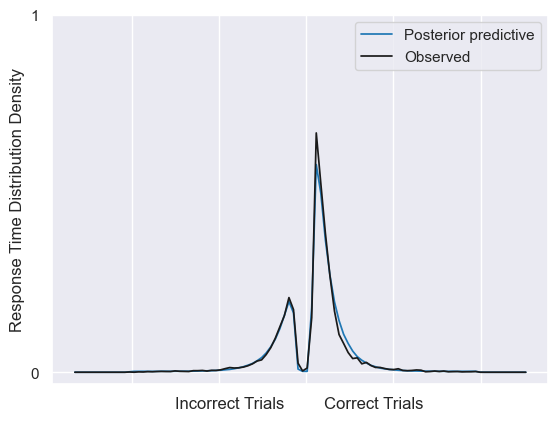

In [8]:
sns.set_palette('colorblind')
sns.set_context('talk')
sns.set_theme(style='darkgrid')
ax = hssm_model['v_condbumpinteract_directiondiffdirinteract_diff'].plot_posterior_predictive(colors = ['tab:blue', 'k'])
# sns.despine()
plt.title('')
plt.xlabel('')
plt.ylabel('Response Time Distribution Density')
plt.tick_params(bottom=False, labelbottom = False)
ax.legend(['Posterior predictive', 'Observed'])
plt.text(s = 'Incorrect Trials', x = -7.5, y = -0.1)
plt.text(s = 'Correct Trials', x = 1, y = -0.1)
plt.yticks((0, 1))
plt.savefig(f'figures/posterior_predictive.png', dpi = 300, transparent = True, bbox_inches = 'tight')

In [10]:
#Renaming columns for plotting graphs
mapper = {'cond':'Choice_Format', 
          'shape':'Shape', 
          'difference':'Shift_Magnitude', 
          'direction':'Global_Extremum_Direction', 
          'diff_dir':'Shift_Direction'
         }
comb_data.rename(columns=mapper, inplace=True)

In [12]:
# az.plot_ppc(models['v_condbumpinteract_directiondiffdirinteract_diff'])
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff'] = hssm.HSSM(data=comb_data, 
          include=
          [{"name": "v",
            "formula": "v ~ Choice_Format*Shape + Global_Extremum_Direction + Shift_Direction*Shift_Magnitude"},
            ],
            hierarchical = False,
            p_outlier = 0.05,
            # lapse=bmb.Prior("Uniform", lower=0.0, upper=20.0),
            loglik_kind = "approx_differentiable",
            prior_settings="safe"
            )


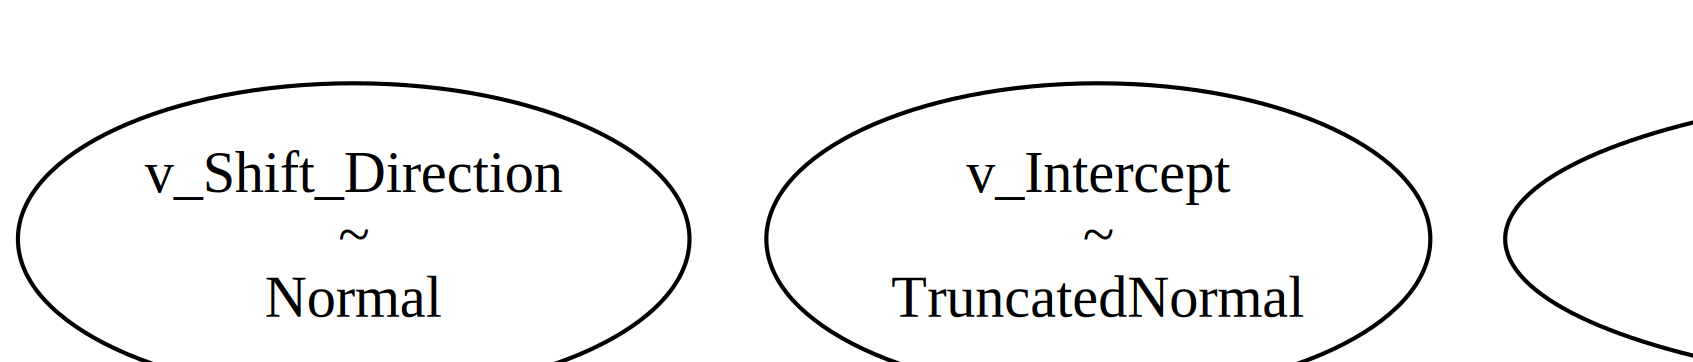

In [13]:
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff'].graph(name = 'figures/ddm_model_graph')

In [61]:
#Relabeling
import arviz.labels as azl
labeller = azl.MapLabeller(var_name_map={"v_bumps_": "v[shape]"},
                           dim_map= {"1_single":"single_extremum", "2_center":"three_extrema"}
                          )
# coords = {"v_bumps_":["1_single", "2_center"]}

In [16]:
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.rename_vars({"v_bumps_":"Shape"}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.rename_vars({"v_cond:bumps_":"Shape:Choice Format"}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.rename_vars({"v_cond":"Choice Format"}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.rename_vars({"v_C(direction)":"Global Extremum Direction"}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.rename_vars({"v_C(diff_dir)":"Shift Direction"}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.rename_vars({"v_C(direction):C(diff_dir)":"Global Extremum Direction:Shift Direction"}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.rename_vars({"v_difference":"Shift Magnitude"}, inplace=True)


hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({'v_C(direction)_dim':['Global Maximum']}, inplace = True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({'v_C(diff_dir)_dim':['Positive']}, inplace = True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({'v_C(direction):C(diff_dir)_dim':['Global Maximum, Positive']}, inplace = True)

hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({"v_bumps__dim":["single_extremum", "three_extrema"]}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({
    "v_cond:bumps__dim":["numerical, single_extremum", "numerical, three_extrema", "slider, single_extremum", "slider, three_extrema"]},
    inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({"v_C(direction)":["Global Maximum"]}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({'v_C(diff_dir)_dim':['Positive']}, inplace=True)
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj.assign_coords({'v_C(direction):C(diff_dir)_dim':['Global Maximum, Positive']}, inplace=True)


In [17]:
hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

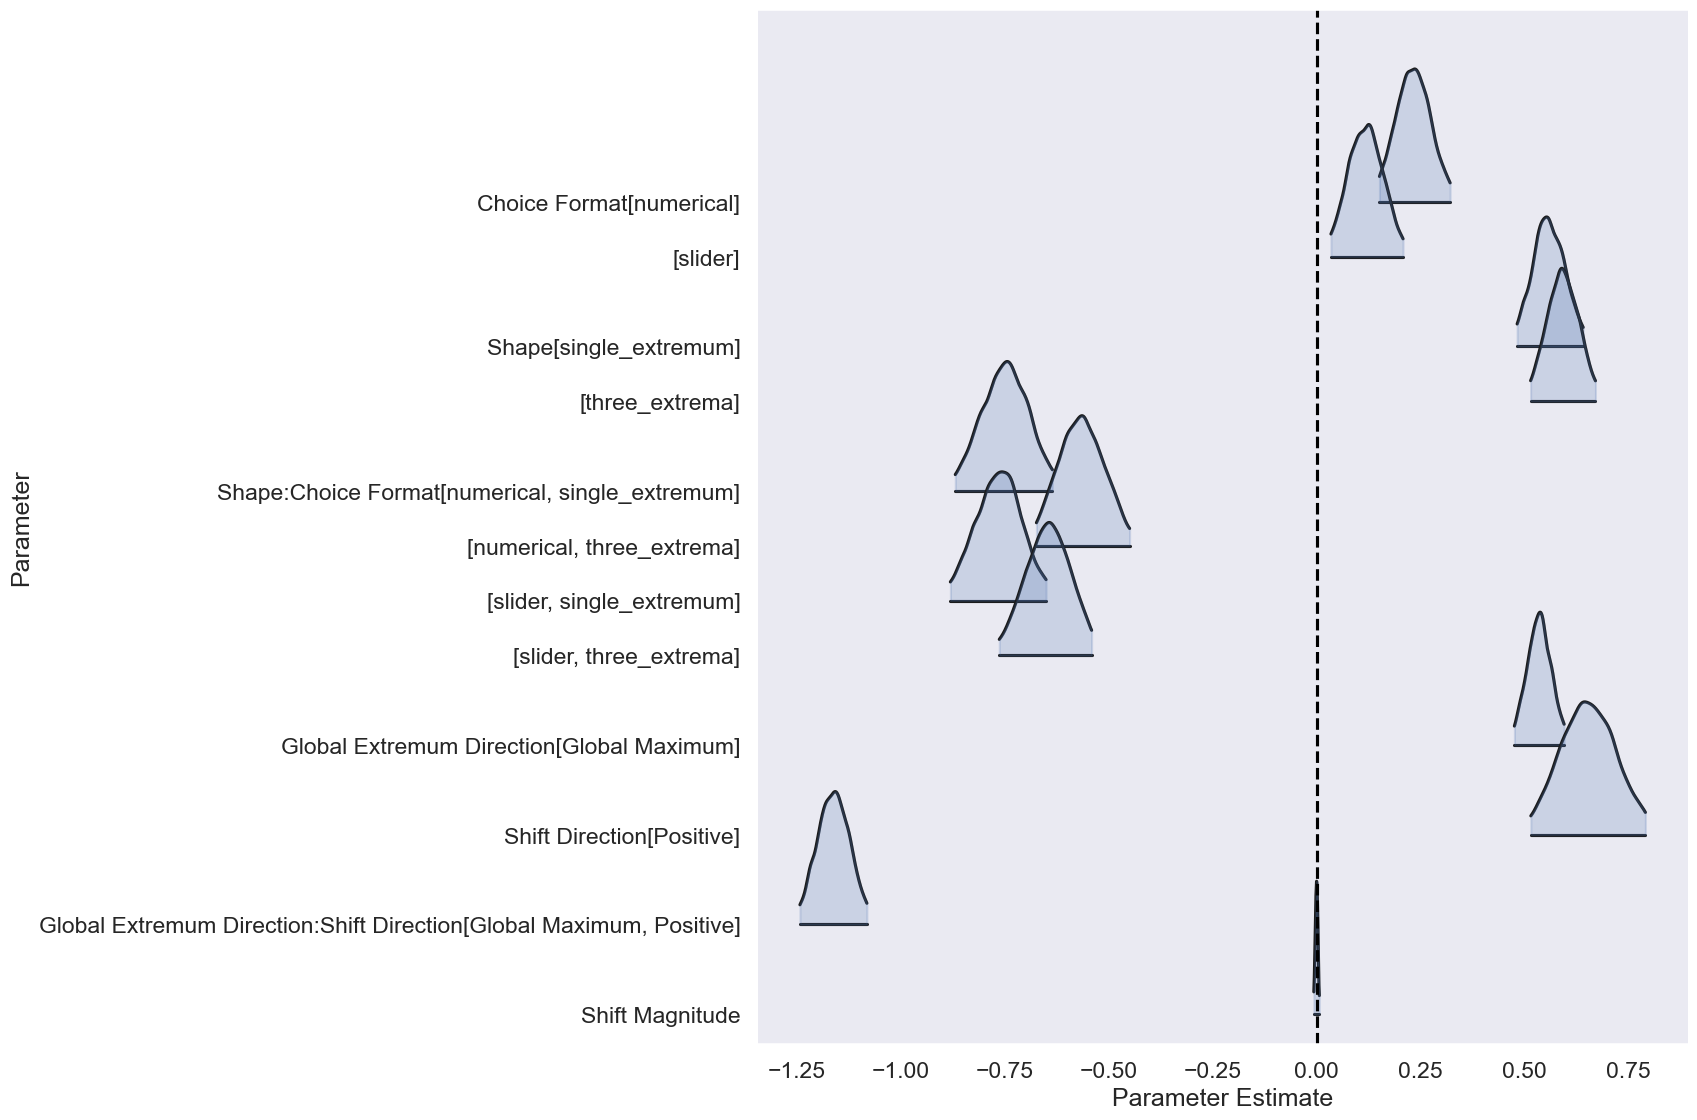

In [24]:
sns.set_context('talk')
az.plot_forest(hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj, 
                hdi_prob=.95, kind = 'ridgeplot', ridgeplot_alpha=0.2, combined=True,
               var_names=['~a', '~t', '~z', '~v_Intercept']
              )
plt.axvline(0, ls = '--', color = 'black')
plt.ylabel('Parameter')
plt.xlabel('Parameter Estimate')
plt.savefig(f'figures/ddm_ridgeplot.png', dpi = 300, transparent = False, bbox_inches = 'tight')


In [26]:
ddm_stats = az.summary(hssm_model['v_condbumpinteract_directiondiffdirinteract_diff']._inference_obj, stat_focus='mean', kind = 'stats', hdi_prob=.95)
with pd.option_context("max_colwidth", 1000):
    ddm_stats.to_latex('ddm_stats_table')

C:\Users\tejas\AppData\Local\Temp\ipykernel_13924\3393863477.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  ddm_stats.to_latex('ddm_stats_table')


In [27]:
ddm_stats

,mean,sd,hdi_2.5%,hdi_97.5%
Choice Format[numerical],0.231,0.044,0.150,0.321
Choice Format[slider],0.117,0.044,0.034,0.208
Shape[single_extremum],0.559,0.041,0.482,0.641
Shape[three_extrema],0.592,0.040,0.514,0.671
"Shape:Choice Format[numerical, single_extremum]",-0.749,0.060,-0.870,-0.635
"Shape:Choice Format[numerical, three_extrema]",-0.567,0.058,-0.675,-0.449
"Shape:Choice Format[slider, single_extremum]",-0.765,0.059,-0.881,-0.650
"Shape:Choice Format[slider, three_extrema]",-0.646,0.057,-0.764,-0.541
Global Extremum Direction[Global Maximum],0.535,0.031,0.475,0.595
Shift Direction[Positive],0.652,0.071,0.514,0.791
